In [157]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import random
from tqdm.notebook import tqdm

In [161]:

trigger_files_path = "/ssd3/giorgian/hits-data-march-2024/trigger/1"
trigger_files_path = "/ssd3/giorgian/hits-data-january-2024-yasser/trigger/events/"

# Use glob.glob with an absolute path
files = glob.glob(os.path.join(trigger_files_path, "*.npz"))  # Match all files in the directory

In [162]:
f = np.load(files[2])

In [163]:
len(files[:1])

1

In [164]:
list(f.keys())

['hit_cartesian',
 'hit_cylindrical',
 'layer_id',
 'n_pixels',
 'energy',
 'momentum',
 'interaction_point',
 'trigger',
 'track_origin',
 'edge_index',
 'edge_index_1',
 'edge_phi_slope',
 'edge_phi_slope_1',
 'edge_z0',
 'edge_z0_1',
 'phi_slope_max',
 'z0_max',
 'particle_id',
 'particle_type',
 'parent_id',
 'parent_particle_type',
 'gparent_id',
 'gparent_particle_type',
 'cylindrical_std']

In [165]:
np.unique(f['particle_id'])

array([-8712, -8710, -8705, -8622, -8253, -8044, -7984, -5894, -5703,
       -5597, -3397, -3218, -3141, -3080, -2952, -2500, -2255, -2182,
        -961,  -767,  -761,  -759,  -694,  -484,  -396,  -311,     2,
          11,    14,    17,    19,    20,    22,    39,    40])

In [166]:
f['trigger_node']

KeyError: 'trigger_node is not a file in the archive'

In [167]:
random.shuffle(files)


(np.float64(-11.662907266616822),
 np.float64(11.750375413894654),
 np.float64(-7.3230669895807905),
 np.float64(10.973223805427551))

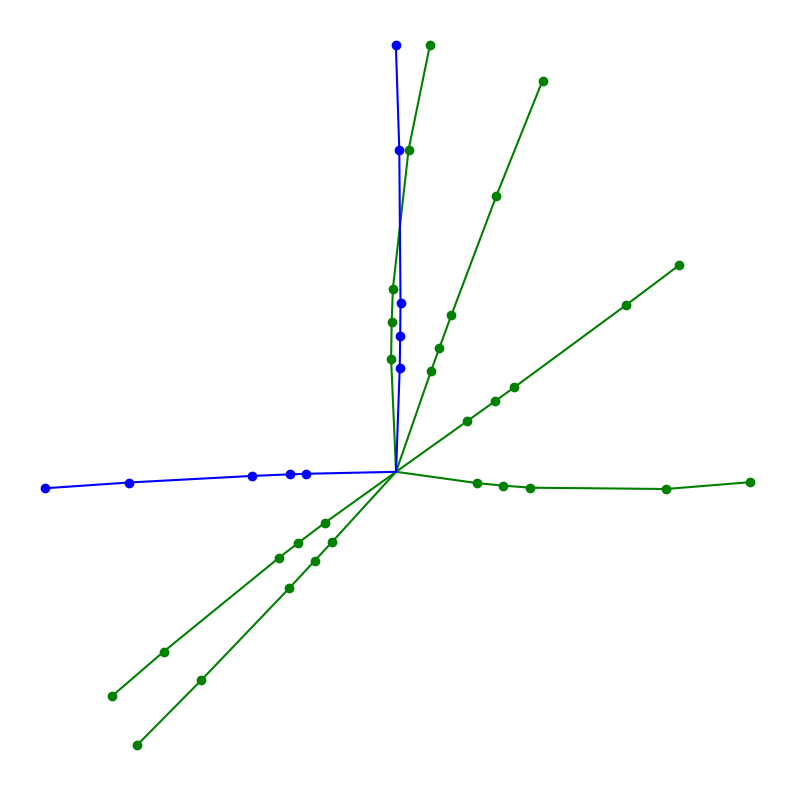

In [168]:
plt.figure(figsize=(10, 10))
for fname in files[:1]:
    f = np.load(fname)
    pids = f['particle_id']
    hits = f['hit_cartesian']
    tracks = np.unique(pids)
    hits_per_track = np.array([np.sum(pids == pid) for pid in tracks])
    tracks = tracks[hits_per_track == 5]
    special = random.sample(list(tracks), 2)

    for i, pid in enumerate(tracks):
        if pid in special:
            continue
        mask = pids == pid
        color = 'green'
        plt.scatter(hits[:, 0][mask], hits[:, 1][mask], color=color)
        r = np.sqrt(hits[:, 0][mask]**2 + hits[:, 0][mask]**2)
        order = np.argsort(r)
        plt.plot([0, hits[mask][0, 0]], [0, hits[mask][0, 1]], color=color)
        for i in range(0, np.sum(mask)-1):
            plt.plot([hits[mask][i, 0], hits[mask][i+1, 0]], [hits[mask][i, 1], hits[mask][i+1, 1]], color=color)

    for pid in special:
        mask = pids == pid
        color = 'blue'
        plt.scatter(hits[:, 0][mask], hits[:, 1][mask], color=color)
        r = np.sqrt(hits[:, 0][mask]**2 + hits[:, 0][mask]**2)
        order = np.argsort(r)
        plt.plot([0, hits[mask][0, 0]], [0, hits[mask][0, 1]], color=color)
        for i in range(0, np.sum(mask)-1):
            plt.plot([hits[mask][i, 0], hits[mask][i+1, 0]], [hits[mask][i, 1], hits[mask][i+1, 1]], color=color)
plt.axis('off')
        

In [169]:
random.sample(list(tracks), 2)

[np.int64(18), np.int64(-7306)]

(-10.0, 10.0)

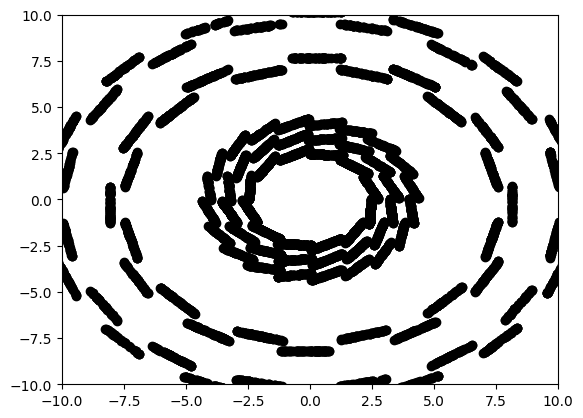

In [170]:
for fname in files[:100]:
    f = np.load(fname)
    layers = f['layer_id']
    mask = (layers == 0) | (layers == 1) | (layers == 2) | (layers == 3) | (layers == 4) | (layers == 5) | (layers == 6)
    hits = f['hit_cartesian']
    plt.scatter(hits[:, 0][mask], hits[:, 1][mask], color='black')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [56]:
list(f.keys())

['hit_cartesian',
 'hit_cylindrical',
 'layer_id',
 'n_pixels',
 'energy',
 'momentum',
 'interaction_point',
 'trigger',
 'track_origin',
 'edge_index',
 'edge_index_1',
 'edge_phi_slope',
 'edge_phi_slope_1',
 'edge_z0',
 'edge_z0_1',
 'phi_slope_max',
 'z0_max',
 'particle_id',
 'particle_type',
 'parent_id',
 'parent_particle_type',
 'gparent_id',
 'gparent_particle_type',
 'cylindrical_std']

In [57]:
f['edge_index_1'].shape

(2, 272)

In [58]:

trigger_files_path = "/ssd3/giorgian/hits-data-december-2024-yasser/trigger-1/events"

# Use glob.glob with an absolute path
files = glob.glob(os.path.join(trigger_files_path, "*.npz"))  # Match all files in the directory

In [150]:
list(f.keys())

['hit_cartesian',
 'hit_cylindrical',
 'layer_id',
 'n_pixels',
 'energy',
 'momentum',
 'interaction_point',
 'trigger',
 'track_origin',
 'edge_index',
 'edge_index_1',
 'edge_phi_slope',
 'edge_phi_slope_1',
 'edge_z0',
 'edge_z0_1',
 'phi_slope_max',
 'z0_max',
 'particle_id',
 'particle_type',
 'parent_id',
 'parent_particle_type',
 'gparent_id',
 'gparent_particle_type',
 'cylindrical_std']

In [151]:
edge_counts = []
edge_counts_old = []
PHI_SLOPE_MAX = 0.012193355583173944
Z0_MAX = 14.220353082111805
for file in tqdm(files):
    f = np.load(file)
    phi_slope = f['edge_phi_slope']
    z0 = f['edge_z0']
    phi_slope_1 = f['edge_phi_slope_1']
    z0_1 = f['edge_z0_1']
    c1 = np.sum((np.abs(phi_slope) < PHI_SLOPE_MAX) & (np.abs(z0) < Z0_MAX))
    c2 = np.sum((np.abs(phi_slope_1) < PHI_SLOPE_MAX) & (np.abs(z0_1) < Z0_MAX))

    edge_counts.append(c1)
    edge_counts_old.append(c2)

  0%|          | 0/10538 [00:00<?, ?it/s]

Text(0, 0.5, 'Frequency')

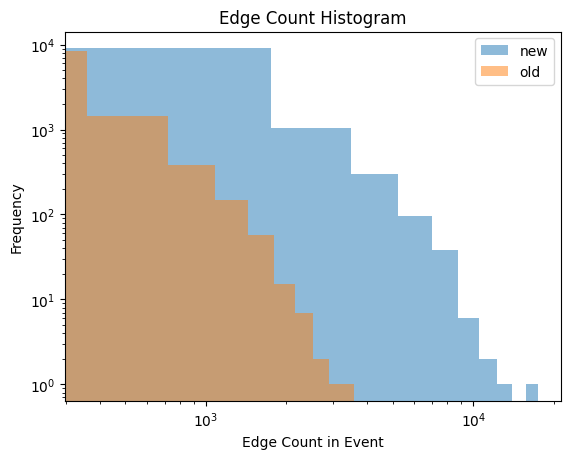

In [156]:
plt.hist(edge_counts, label='new', alpha=0.5)
plt.hist(edge_counts_old, label='old', alpha=0.5)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Edge Count Histogram')
plt.xlabel('Edge Count in Event')
plt.ylabel('Frequency')

(-10.0, 10.0)

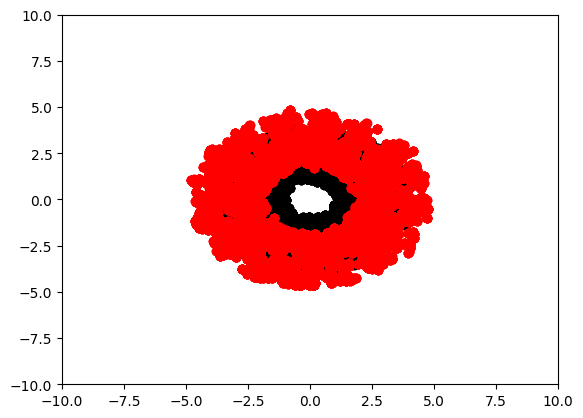

In [60]:
for fname in files[:100]:
    f = np.load(fname)
    layers = f['layer_id']
    mask = layers == 0
    hits = f['hit_cartesian']
    plt.scatter(hits[:, 0][mask], hits[:, 1][mask], color='black')
for fname in files[:100]:
    f = np.load(fname)
    layers = f['layer_id']
    mask = layers == 1
    hits = f['hit_cartesian']
    plt.scatter(hits[:, 0][mask], hits[:, 1][mask], color='red')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [61]:
f['hit_cartesian'].shape

(234, 3)

In [62]:
fname

'/ssd3/giorgian/hits-data-december-2024-yasser/trigger-1/events/event100007277.npz'

In [63]:
g = np.load('/ssd3/giorgian/hits-data-december-2024-yasser/trigger/events/event100011366.npz')

In [64]:
g['hit_cartesian'].shape

(76, 3)